## Unsupervised Learning

This is my ATM Project (Amati (observe), Tiru (imitate), Modifikasi (modification))
Learn into ML DL AI as the beginner to be a hero!

In this case, we want to clustering whisky that has similar taste.

### Import Libraries

In [5]:
import numpy as np # array manipulation
import pandas as pd # data manipulation
from sklearn.cluster import KMeans # clustering
from sklearn.preprocessing import StandardScaler # ensure data has balanced scale
import matplotlib.pyplot as plt # visualization

### Import Dataset

In [3]:
dt = pd.read_csv("data_input/ul/whiskies.txt")
dt.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15   Latitude   86 non-null     int64 
 16   Longitude  86 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


We have 86 rows with 17 columns. Below is description of our data.

- Body: flavour (light/heavy)
- Sweetness: sweetness level 
- Smoky: smoky taste level
- Medicinal: bitterness like medicine level 
- Tobacco: tobacco taste level
- Honey: honey taste level
- Spicy: spicy level
- Winey: grape flavour level
- Nutty: nut taste level
- Malty: malt flavour level
- Fruity: fruit taste level
- Floral: flower taste level

### Exploratory Data Analysis

##### Select just numerical data

In [6]:
dt = dt[['Body', 'Sweetness', \
         'Smoky', 'Medicinal', \
         'Tobacco', 'Honey', \
         'Spicy', 'Winey', 'Nutty',\
         'Malty', 'Fruity', 'Floral']]

##### Check missing value

In [7]:
dt.isnull().any()

Body         False
Sweetness    False
Smoky        False
Medicinal    False
Tobacco      False
Honey        False
Spicy        False
Winey        False
Nutty        False
Malty        False
Fruity       False
Floral       False
dtype: bool

##### Duplicate

In [8]:
dt.duplicated().any()

False

Our data has no missing value dan duplicates, so we can continue our process.

##### Scaler

In [10]:
scale = StandardScaler()
scaled = scale.fit_transform(dt)

### Modelling

##### Check the optimum k number

In [12]:
num = []
for k in range(1,6): # check in range 1 to 5
    kmeans = KMeans(n_clusters = k, random_state = 57) # make a kmeans model
    kmeans.fit(scaled) # train with scaled input
    num.append(kmeans.inertia_)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


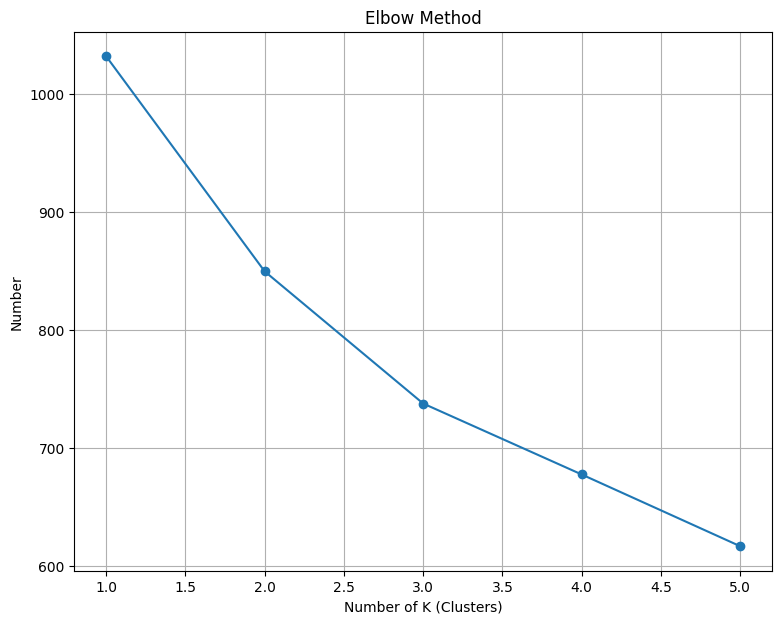

In [14]:
plt.figure(figsize = (9, 7)) # canvas size
plt.plot(range(1, 6), num, marker = 'o', linestyle = '-') # bring the inertia and plot it with - line
plt.xlabel("Number of K (Clusters)") # label in x axis
plt.ylabel("Number") # label in y axis
plt.title("Elbow Method") # title of plot
plt.grid(True)
plt.show()

From graph above, we can tell that the optimum based on elbow line is 3, so we can use 3 as our K.

In [15]:
# insert to KMeans function
kmeans = KMeans(n_clusters = 3, random_state = 57)

# clusters labels
cl_labels = kmeans.fit_predict(scaled)

In [17]:
# insert clusters label to our data
dt['Cluster'] = cl_labels
dt.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Cluster
0,2,2,2,0,0,2,1,2,2,2,2,2,1
1,3,3,1,0,0,4,3,2,2,3,3,2,1
2,1,3,2,0,0,2,0,0,2,2,3,2,2
3,4,1,4,4,0,0,2,0,1,2,1,0,0
4,2,2,2,0,0,1,1,1,2,3,1,1,1


In [18]:
# see total of whiskey in each clusters
dt.Cluster.value_counts()

2    41
1    34
0    11
Name: Cluster, dtype: int64

In [22]:
dt.groupby("Cluster").max()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Cluster,,,,,,,,,,,,
0,4,2,4,4,1,2,3,2,2,2,2,2
1,4,4,3,2,1,4,3,4,4,3,3,4
2,2,4,3,1,1,2,3,2,2,2,3,4


We can conclude 

- The optimum K = 3 based on elbow method graph.
- Whiskies successfully clustered into 3 cluster.
- Cluster 0 wwhich has characteristics the flavour is heavy, not too sweet, smoky taste, bitter, small hint of tobacco, litte bit honey, grape, nut, malt, fruity, floral taste, and kinda spicy.
- Cluster 1 which has characteristics the flavour is heavy, very sweet, little bit smoky, spicy, malty, fruity, less bitter, any hint of tobacco, full taste of honey, grapes, nuts, and floral.
- Cluster 2 which has characteristics the flavour is light, very sweet, less bitter and tobacco, there is hint of honey, grapes, nuts, malt, little bit smoky, spicy, fruity, and sense of flower.

If you have any advice for this work or suggestion what i should learn next, you can send an [email](mailto:rahfairuzran@gmail.com) to me